# Sources effect on Rating
***
#### Aidan Mason-Mondesire (100821742), November 27th 2022, CSCI2000U

The data set I chose to analyze was from [Kaggle.com](https://www.kaggle.com/datasets/heyrobin/action-anime-list?resource=download). 
There I chose one that had information about the top 14,000 anime of all time sourced from the popular anime rating/discussion website [My Anime List](https://myanimelist.net/) (MAL). This rating info is opinionated data, ratings came from individuals across the world so rating is overall subjective. So is my hypothesis though, my hypothesis is that the anime that are more well perceived are originally sourced from manga as opposed to being original or from another source. The rest of the information in the data set should be accurate though with things like genre, source, and episode count since they're publicly accessible static information. I noticed that the top few anime as I scrolled down the list were mainly from manga, even though manga wasn't the majority when it came to source material. This cool bit of information got me interested in seeing the relationship between source and rating, as well as what other factor might play into how well an anime is received. What trends might show up when examining the data. Depending on the results of the analysis, it could bring up more interesting questions like if mangakas (manga authors) tend to make more interesting or enjoyable media than the animation studies who make original anime.

## Data Collection

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
#Loading the dataset
anime = pd.read_csv('AnimeList.csv')

## Data Cleaning
The list is ordered from highest score to lowest score. There were 1283 elements at the end of the list that had no score (NaN), so we removed these rows. As well as removing some of the columns that had unnessessary information that we aren't using in the analysis. We also removed any anime that were a part of sources that had less than 100 entries out of the 14,000 (259 elements). This was the keep some consistency, since there isn't much point in analysing entries with an insignificant amount of adaptations.

In [40]:
anime = anime.dropna(axis=0,subset=["Score"]) #removes the rows with NaN value Score
anime = anime.drop(['Japanese', 'Type', 'Aired', 'Licensors', 'Producers', 'Members'], axis=1) #removes specified 
obsoleteSources = ['Book', 'Card game','Mixed media','Picture book','Radio','Web novel'] #creates a list of sources to remove
anime = anime[anime.Source.isin(obsoleteSources) == False] #removes the sources from the dataframe

In [41]:
anime #displays the new dataframe

,Ranking,Title,Episodes,Duration,Score,Source,Genres,Themes,Rating,Status,Studios
0,1,Fullmetal Alchemist: Brotherhood,64,24 min. per ep.,9.14,Manga,"ActionAction,AdventureAdventure,DramaDrama,Fan...",MilitaryMilitary,R - 17+ (violence & profanity),Finished Airing,Bones
1,2,Gintama°,51,24 min. per ep.,9.08,Manga,"ActionAction,ComedyComedy,Sci-FiSci-Fi","Gag HumorGag Humor,HistoricalHistorical,Parody...",PG-13 - Teens 13 or older,Finished Airing,Bandai Namco Pictures
2,3,Steins;Gate,24,24 min. per ep.,9.08,Visual novel,"DramaDrama,Sci-FiSci-Fi,SuspenseSuspense","PsychologicalPsychological,Time TravelTime Travel",PG-13 - Teens 13 or older,Finished Airing,White Fox
3,4,Shingeki no Kyojin Season 3 Part 2,10,23 min. per ep.,9.07,Manga,"ActionAction,DramaDrama","GoreGore,MilitaryMilitary,SurvivalSurvival",R - 17+ (violence & profanity),Finished Airing,Wit Studio
4,5,Gintama',51,24 min. per ep.,9.05,Manga,"ActionAction,ComedyComedy,Sci-FiSci-Fi","Gag HumorGag Humor,HistoricalHistorical,Parody...",PG-13 - Teens 13 or older,Finished Airing,Sunrise
...,...,...,...,...,...,...,...,...,...,...,...
12712,12713,Kokuhaku,1,40 sec.,2.29,Original,HorrorHorror,None,R - 17+ (violence & profanity),Finished Airing,add some
12713,12714,Nami,1,3 min.,2.25,Original,Avant GardeAvant Garde,None,R+ - Mild Nudity,Finished Airing,add some
12714,12715,Hametsu no Mars,1,19 min.,2.22,Visual novel,"HorrorHorror,Sci-FiSci-Fi",None,R - 17+ (violence & profanity),Finished Airing,WAO World
12715,12716,Utsu Musume Sayuri,1,3 min.,1.99,Original,"Avant GardeAvant Garde,ComedyComedy",None,R+ - Mild Nudity,Finished Airing,add some


## Analysis


### Score based on Source:

Below I group the data by their source material, counting up the amount of adaptations each source had.

In [42]:
#Table 1
groupedSource = anime.groupby(['Source']).size()
groupedSource

Source
4-koma manga     264
Game             826
Light novel      773
Manga           3424
Music            268
Novel            480
Original        3773
Other            425
Unknown         1622
Visual novel     375
Web manga        228
dtype: int64

Here, I take the count of the sources and plot them in a bar graph for a visual representation of the above table. There are a few sources that stand out that are more common than the rest.

In [43]:
#creating custom orders and colour pallettes to use on the bar graphs
ordered=['Original','Manga','Unknown','Game','Light novel','Novel','Other','Visual novel','4-koma manga','Music','Web manga']
colours = ['#800000','#9A6324','#808000','#469990','#000075','#4363d8','#911eb4','#f032e6','#bfef45','#aaffc3','#ffd8b1']

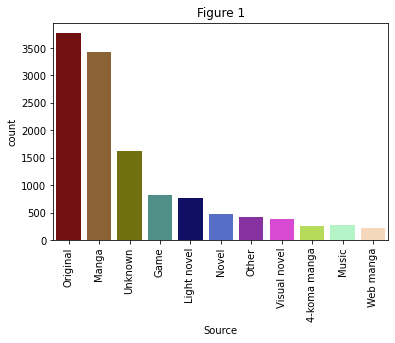

In [44]:
#Source Distribution
sourcePlot = sns.countplot(data=anime, x='Source',palette=colours,order=ordered) #creates the countplot
p = plt.xticks(rotation=90) # setting the function equal to p to avoid the output text from displaying
p = plt.title('Figure 1')

Comparing the average scores of each of the sources:

In [45]:
#Comparison of Mean MAL Scores (Table 2)
d1 = anime.groupby('Source')['Score'].mean() #gets the mean scores
round(d1,2) #rounding the results to 2 decimal places for easier reading

Source
4-koma manga    6.72
Game            6.37
Light novel     7.02
Manga           6.94
Music           5.78
Novel           6.84
Original        6.18
Other           6.11
Unknown         6.13
Visual novel    6.56
Web manga       6.81
Name: Score, dtype: float64

Visualizing the mean scores, there is not a lot of variation

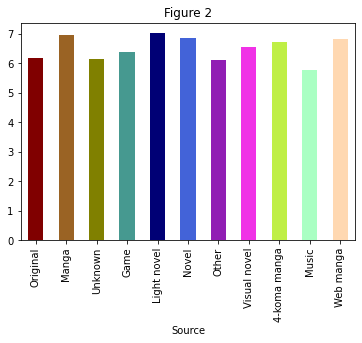

In [46]:
g1 = d1.loc[ordered].plot.bar(color=colours) #creating a bar plot
p = plt.title('Figure 2')

There seems to not be a large difference in score when it comes to the mean scores of each source whewn we look at the numeric difference

In [47]:
d1.describe()
difference = d1.max() - d1.min()  #getting the difference between the highest and lowest rated source
round(difference,2) #rounding our answer to 2 decimals

1.24

In [48]:
origMan = abs(6.18-6.94)
round(origMan,2) #getting the difference between original and manga

0.76

### Score based on Episodes:

For this section I attempted to come up with some relationship between the amount of episodes in an anime and the score is received.

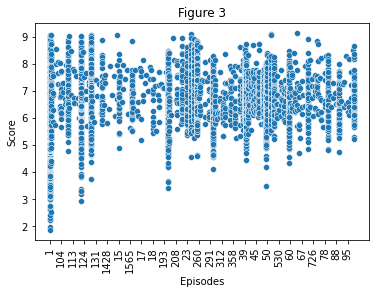

In [49]:
epA = anime.sort_values('Episodes',ascending=True) #sorts the values 
g2 = sns.scatterplot(x='Episodes',y='Score',data=epA) #creating a scatterplot of the individual episode/score points
p = plt.xticks(rotation=90) #rotates the labels on the x-axis
p = g2.set_xticks(g2.get_xticks()[::7]) #makes the x-axis only show every 7 ticks
p = plt.title('Figure 3')

## Discussion
In this assignment, I used a dataset of the top anime of all time and chose to study the correlation between an anime's source material and the score they received by the community as well as attempted to show a relationship between episode count and score. In figure 1, we see the distribution of adaptations is incrediby varied. Manga, and Originals have way more adaptations than any other source material. This made the data obtained and visualized in figure 2 very skewed and is an example of class imbalance. This makes our data quite untrustworthy but we stuck with the data nonetheless. We found that there wasn't that much of a difference in mean scores and the difference only ended up being that of 1.24 points. If we weigh their respective means in relation to this difference, Original animes rank in the bottom 3 on the list while Manga animes rank in the top 2 (They differ by 0.78 points). This is one piece of evidence that could support the claim of Manga being a more well received source material. However looking at the data the "most well received" would be ones sourced from Light Novels. Again, this could due to the class imbalance since Light Novels have 773 entries compared to the thousands of originals or mangas. I then wanted to explore the relationship between Episode count and the score it received. This proved difficult however for multiple reasons. Firstly, I could not get my scatterplot's x-axis to go in sorted order numerically, so it's hard to read a relationship with unordered data. Lastly, there was such a high variation is scores for almost every single episode number that the only real conclusion we can make is that there is no relationship between episode count and the score of that anime. Overall, we found that there was not much variation when it came to the relationships between source material and score, but there was some weak evidence to support the claim that manga adaptations do better than originals. We also found that there was no relationship between episode count and score.

side note: I believe this analysis would have worked better if there was less class imbalance, potentially only taking the top 100 of each anime and then comparing them all as opposed to comparing the averages of all in general. 

## References
1. Sourced Data: https://www.kaggle.com/datasets/heyrobin/action-anime-list?resource=download
2. Pandas for data manipulation
3. Seaborn for data visualization
4. Matplotlib for data visualization